In [9]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import imageio

root_dir = os.path.abspath('.')
data_dir = ''

train = pd.read_csv(os.path.join(data_dir,'train.csv'))
test = pd.read_csv(os.path.join(data_dir,'test.csv'))

#train = pd.read_csv("c:\\Users\\srmvec\\Downloads\\train.csv")


Age:  YOUNG


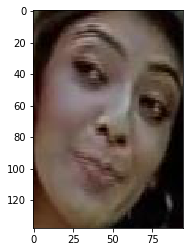

In [38]:
#print(train.head)

i = random.choice(train.index)

img_name = train.ID[i]
img = imageio.imread(os.path.join(data_dir, 'Train', img_name))

print("Age: ", train.Class[i])
plt.imshow(img)


In [39]:
#from scipy.misc import imresize
from PIL import Image

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    #img = imageio.imread(img_path)
    
    img = Image.open(img_path)  
    img = img.resize((32, 32)) 
    #img = im.img.imresize(32, 32)
    
#    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)


In [40]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    #img = imread(img_path)
    #img = imresize(img, (32, 32))
    
    img = Image.open(img_path)  
    img = img.resize((32, 32))
    temp.append(img)

test_x = np.stack(temp)


In [44]:
train_x = train_x / 255.
test_x = test_x / 255.

train.Class.value_counts(normalize=True)


MIDDLE    0.544436
YOUNG     0.334622
OLD       0.120941
Name: Class, dtype: float64

In [45]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)


In [46]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128


In [47]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer


In [48]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])
#print(model.summary())



In [31]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)


In [50]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)


Train on 11999 samples, validate on 3000 samples
Epoch 1/5
11999/11999 [==============================] - 4s 375us/step - loss: 1.0435 - accuracy: 0.5398 - val_loss: 1.0037 - val_accuracy: 0.5460
Epoch 2/5
11999/11999 [==============================] - 4s 361us/step - loss: 0.9855 - accuracy: 0.5440 - val_loss: 0.9719 - val_accuracy: 0.5460
Epoch 3/5
11999/11999 [==============================] - 4s 360us/step - loss: 0.9657 - accuracy: 0.5440 - val_loss: 0.9605 - val_accuracy: 0.5460
Epoch 4/5
11999/11999 [==============================] - 4s 367us/step - loss: 0.9584 - accuracy: 0.5440 - val_loss: 0.9561 - val_accuracy: 0.5460
Epoch 5/5
11999/11999 [==============================] - 4s 348us/step - loss: 0.9554 - accuracy: 0.5440 - val_loss: 0.9543 - val_accuracy: 0.5460


In [54]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred



Original: YOUNG Predicted: ['MIDDLE' 'MIDDLE' 'MIDDLE' ... 'MIDDLE' 'MIDDLE' 'MIDDLE']


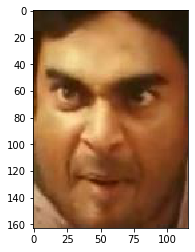

In [63]:
i = random.choice(train.index)
img_name = train.ID[i]

#img_name = train.ID[i]
img = imageio.imread(os.path.join(data_dir, 'Train', img_name))

#img = img.resize((128, 128))
#img = imread(os.path.join(data_dir, 'Train', img_name)).astype('float32')
#imshow(imresize(img, (128, 128)))


#img_path = os.path.join(data_dir, 'Train', img_name)
    #img = imread(img_path)
    #img = imresize(img, (32, 32))
    
#img = Image.open(img_path)  
#img = img.resize((256, 256))



plt.imshow(img)
#img = img.resize((32, 32))


pred = model.predict_classes(train_x)
print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred))

